In [3]:
#Import libraries
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from numpy import random
from numpy import mean
import matplotlib.pyplot as plt
import sklearn
from datetime import timedelta
from scipy import stats
from scipy.stats import poisson
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from statistics import NormalDist
from sklearn.preprocessing import StandardScaler

# 1. Getting Started

In [4]:
#Read in dataset
df = pd.read_csv("capel-st-2015.csv")

In [5]:
df.shape

(365, 4)

In [6]:
df.head(5)

,Date,Capel_Street,IN,OUT
0,01/01/2015,3481,1593,1888
1,02/01/2015,4437,2150,2287
2,03/01/2015,5278,2819,2459
3,04/01/2015,4098,2020,2078
4,05/01/2015,5757,3162,2595


In [7]:
df.tail(5)

,Date,Capel_Street,IN,OUT
360,27/12/2015,4481,2165,2316
361,28/12/2015,4685,2254,2431
362,29/12/2015,5243,2481,2762
363,30/12/2015,5224,2546,2678
364,31/12/2015,5326,2704,2622


In [8]:
#Check data types
df.dtypes

Date            object
Capel_Street     int64
IN               int64
OUT              int64
dtype: object

In [9]:
#Rename columns for readability and consistency purposes
df.rename(columns={"Capel_Street": "Footfall", "IN": "In", "OUT": "Out"}, inplace=True)
df

,Date,Footfall,In,Out
0,01/01/2015,3481,1593,1888
1,02/01/2015,4437,2150,2287
2,03/01/2015,5278,2819,2459
3,04/01/2015,4098,2020,2078
4,05/01/2015,5757,3162,2595
...,...,...,...,...
360,27/12/2015,4481,2165,2316
361,28/12/2015,4685,2254,2431
362,29/12/2015,5243,2481,2762
363,30/12/2015,5224,2546,2678


# 2. Statistics
This sections contains statisical graphs and calulations

## 2.1 Data Spread and Central Tendency

<AxesSubplot:xlabel='Footfall', ylabel='Count'>

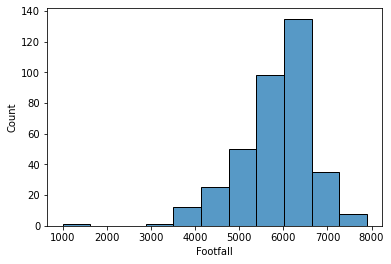

In [10]:
#Histogram
sns.histplot(df.Footfall, bins=11)

<AxesSubplot:xlabel='Footfall'>

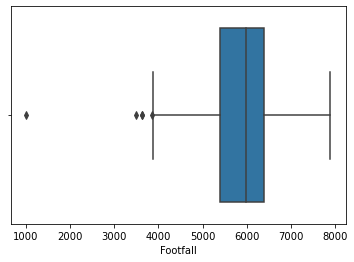

In [11]:
#Boxplot with Interquartile Range
sns.boxplot(x=df["Footfall"])

In [12]:
#Pulling some values of the above plot to use in the report
Q1 = np.quantile(df.Footfall, 0.25)
median = df["Footfall"].median()
Q3 = np.quantile(df.Footfall, 0.75)
IQR = Q3 - Q1
print("Q1 is: " + str(Q1))
print("The median is: " + str(median))
print("Q3 is: " + str(Q3))
print("And the Interquartile Range is: " + str(IQR))

Q1 is: 5391.0
The median is: 5978.0
Q3 is: 6399.0
And the Interquartile Range is: 1008.0


In [13]:
#Mean calculation for use in report. Already did median earlier
mean = df["Footfall"].mean()

print("The mean is: " + str(mean))
print("The median is: " + str(median))

The mean is: 5841.2986301369865
The median is: 5978.0


In [14]:
#Standard Deviation
std = df["Footfall"].std()
std

817.6367789754098

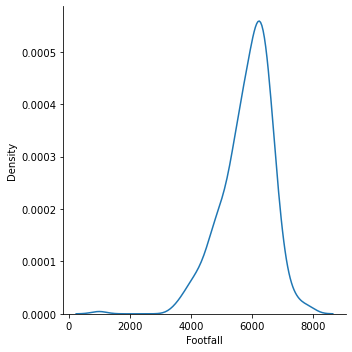

In [15]:
sns.displot(df.Footfall, kind="kde")

## 2.2 Poisson Distribution
Plotting a Poisson Distribution using the mean value of our dataset as the mu value.
Will also include a few calculations

In [16]:
#Reading in all the values in Footfall and putting it into an array. Then sorting it
footfallArray = []
for t in df.Footfall:
    footfallArray.append(t)
footfallArray.sort()
footfallArray

[996,
 3481,
 3622,
 3637,
 3863,
 3880,
 3895,
 3906,
 3913,
 4098,
 4110,
 4125,
 4126,
 4128,
 4142,
 4241,
 4308,
 4314,
 4379,
 4384,
 4407,
 4437,
 4461,
 4481,
 4481,
 4535,
 4574,
 4586,
 4601,
 4611,
 4629,
 4633,
 4685,
 4724,
 4740,
 4740,
 4744,
 4748,
 4758,
 4760,
 4785,
 4796,
 4823,
 4837,
 4843,
 4886,
 4896,
 4900,
 4901,
 4905,
 4906,
 4936,
 4939,
 4969,
 4972,
 4987,
 4990,
 5018,
 5020,
 5023,
 5027,
 5065,
 5084,
 5104,
 5121,
 5122,
 5146,
 5178,
 5184,
 5186,
 5207,
 5214,
 5215,
 5220,
 5221,
 5224,
 5243,
 5246,
 5276,
 5278,
 5286,
 5317,
 5326,
 5330,
 5330,
 5336,
 5364,
 5377,
 5380,
 5387,
 5390,
 5391,
 5398,
 5416,
 5432,
 5438,
 5453,
 5453,
 5453,
 5461,
 5466,
 5480,
 5485,
 5491,
 5498,
 5504,
 5505,
 5505,
 5507,
 5522,
 5537,
 5539,
 5548,
 5559,
 5567,
 5579,
 5580,
 5586,
 5596,
 5623,
 5627,
 5631,
 5635,
 5637,
 5638,
 5642,
 5644,
 5673,
 5680,
 5684,
 5687,
 5689,
 5691,
 5692,
 5693,
 5697,
 5704,
 5711,
 5719,
 5720,
 5724,
 5743,
 5757,


In [17]:
#n my number of events for the poisson. number is roughly double the mean to show symmetry. For the report
n = np.arange(0,11864)

In [18]:
#Let mu be the mean of the footfall
mu = np.mean(footfallArray)
print(mu)

5841.2986301369865


In [19]:
#For n events, calculates the probability of each number happening. Very very small chances so numbers aren't clearly visible
probMassFunction = poisson.pmf(n, mu=mu)
print(probMassFunction)

[0. 0. 0. ... 0. 0. 0.]


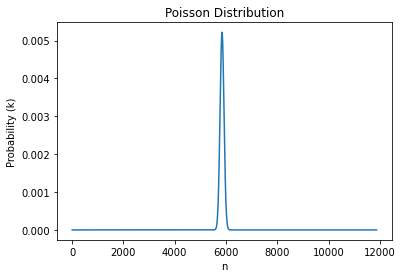

In [20]:
#Poisson Distribution
plt.plot(n, probMassFunction)
plt.xlabel("n")
plt.ylabel("Probability (k)")
plt.title("Poisson Distribution")

plt.show()

In [21]:
#Probability that the counter will read 5,841
poisson.pmf(k=5841, mu=mu)

0.005219837118644279

In [22]:
#prob of 4 or less
poisson.cdf(k=4, mu=7)

0.17299160788207146

In [23]:
#Probability that the counter will read 5,800 or less
poisson.cdf(k=5800, mu=mu)

0.2972746739166649

In [24]:
#Probability that the counter will read greater than 6000 at the end of the day
1 - poisson.cdf(k=6000, mu=mu)

0.018954909766735306

## 2.3 Normal Distribution
Plotting a Normal Distribution by using the dataset's mean and standard deviation values. Then I will compare it to the Poisson by overlapping it on a graph

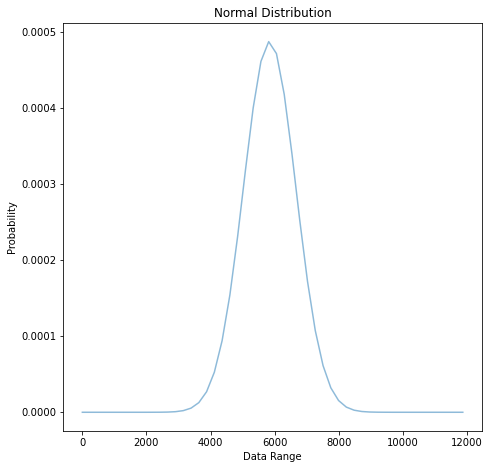

In [25]:
#Normal Distribution Graph
x = np.linspace(0, 11864)

plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.norm(mu, std).pdf(x),alpha=0.5)

plt.title("Normal Distribution")
plt.xlabel("Data Range")
plt.ylabel("Probability")
plt.show()

In [26]:
#Given a mean and standard deviation, the chances of having 3,500 or less in a given day
NormalDist(mu=mu, sigma=std).cdf(3500)

0.002094978737935016

In [27]:
#Chances of 6,500 or more visitors in a day
1 - NormalDist(mu=mu, sigma=std).cdf(6500)

0.2102321138115515

## 2.4 Normal vs Poisson

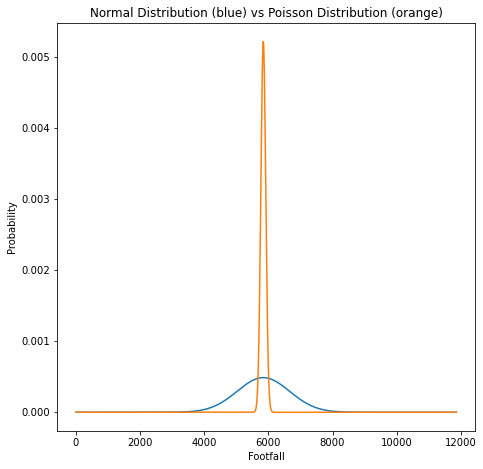

In [28]:
#
# Values of random variable
#
#
plt.figure(figsize=(7.5,7.5))
#
# Normal distribution with mean 0 and std as 1
#
plt.plot(n, stats.norm(mu, std).pdf(n))
plt.plot(n, probMassFunction)

plt.title('Normal Distribution (blue) vs Poisson Distribution (orange)')
plt.xlabel('Footfall')
plt.ylabel('Probability')
plt.show()

## 2.5 Normal Fitted Curve to the dataset

In [29]:
data = []
data = df["Footfall"]
[meanFit, stdFit] = scipy.stats.norm.fit(data)

print(meanFit)
print(stdFit)

5841.2986301369865
816.5159603827517


In [30]:
#Returns evenly spaced intervals between the specifed parameters
x = np.linspace(0,11864)

Text(0.5, 1.0, 'Normal Fitted Curve')

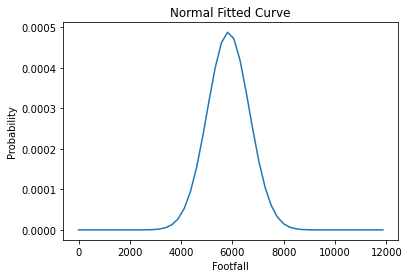

In [31]:
plt.plot(x,scipy.stats.norm.pdf(x,meanFit,stdFit),)
plt.xlabel("Footfall")
plt.ylabel("Probability")
plt.title("Normal Fitted Curve")

# 3 Data Preperation and Visualisation
Cleaning and preparing the data for Machine Learning. Contains visualisations to gain insights on the dataset

## 3.1 Data Cleaning

In [41]:
for n in range(0,365):
    x = 0;
    x = df["In"][n] + df["Out"][n]
    if x != df["Footfall"][n]:
        print("Error")
        break;
    ##print(str(x))

3481
4437
5278
4098
5757
5642
4308
4905
4969
5453
3913
5020
5027
4936
4900
5820
5844
4407
5596
5480
5687
6058
5830
6288
4481
5380
5691
5377
5364
6075
6255
4601
5498
5796
5975
6286
5946
6648
4379
5336
4785
5760
5184
5821
5974
4535
5635
5981
6512
6163
5330
5757
3880
4837
5505
5810
5485
5993
6133
3906
5146
5689
6113
6334
5978
6139
4611
5178
5743
5918
5330
6301
6362
5104
6830
6597
6339
6502
6137
6522
5023
5491
5586
5809
6198
6702
6136
4461
4990
5214
5453
5416
5505
5939
4128
5387
6219
6043
6604
6277
6079
4314
6054
5767
5919
6936
5810
6897
4939
5967
6322
6399
6381
5697
6020
4896
5461
5580
5638
6670
5909
4142
4796
4629
4987
5391
6517
5390
6327
4843
5769
5684
6564
6142
6872
6415
4586
5548
5829
6221
6127
6584
7362
5215
5900
6358
5537
6116
6131
6327
4724
3622
5692
6509
6173
6084
6462
4744
5903
5989
6312
6424
6542
6326
5084
5724
5854
5969
6365
6282
6321
4748
5623
6135
5928
6171
6463
5874
5122
6020
5876
5680
6174
6429
5855
4574
5220
5868
4758
6326
6186
6168
4972
5631
6314
6409
5719
6385
5881
4740


In [30]:
#Converts object type of the date column, as seen earlier during Section 1, to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, yearfirst=False)

In [31]:
df.head()

,Date,Footfall,In,Out
0,2015-01-01,3481,1593,1888
1,2015-01-02,4437,2150,2287
2,2015-01-03,5278,2819,2459
3,2015-01-04,4098,2020,2078
4,2015-01-05,5757,3162,2595


In [32]:
#Checking to see it worked
df.dtypes

Date        datetime64[ns]
Footfall             int64
In                   int64
Out                  int64
dtype: object

In [33]:
print((df["Date"][4].weekday())) #0 is Monday, 6 is Sunday

0


In [34]:
def convertToDayOfWeek(num):
    if num == 0:
        return "Monday"
    elif num == 1:
        return "Tuesday"
    elif num == 2:
        return "Wednesday"
    elif num == 3:
        return "Thursday"
    elif num == 4:
        return "Friday"
    elif num == 5:
        return "Saturday"
    elif num == 6:
        return "Sunday"
    else:
        return "NaN"

In [35]:
print(convertToDayOfWeek((df["Date"][4].weekday())))

Monday


In [36]:
df["Date"][0].strftime("%B")

'January'

In [37]:
#Iterate through the days and convert them to strings of the days. Monday, Tuesday, etc. Placed into an array
dayArray = []
for days in df["Date"]:
    dayArray.append(days.strftime("%A"))

In [38]:
#Same as above but for the months of the year
monthArray = []
for months in df["Date"]:
    monthArray.append(months.strftime("%B"))

In [39]:
#Make new DayOfWeek column
df = df.assign(DayOfWeek=dayArray)

In [40]:
#Make new Month column
df = df.assign(Month=monthArray)

In [41]:
#Check the head to see if it worked
df.head()

,Date,Footfall,In,Out,DayOfWeek,Month
0,2015-01-01,3481,1593,1888,Thursday,January
1,2015-01-02,4437,2150,2287,Friday,January
2,2015-01-03,5278,2819,2459,Saturday,January
3,2015-01-04,4098,2020,2078,Sunday,January
4,2015-01-05,5757,3162,2595,Monday,January


## 3.2 Data Visualisation
Section for graphs

Text(0, 0.5, 'Daily Count')

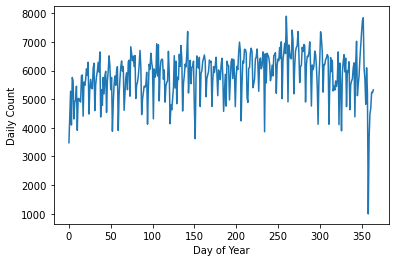

In [42]:
#Line Graph
df["Footfall"].plot.line()
plt.xlabel("Day of Year")
plt.ylabel("Daily Count")

<AxesSubplot:xlabel='Footfall', ylabel='Count'>

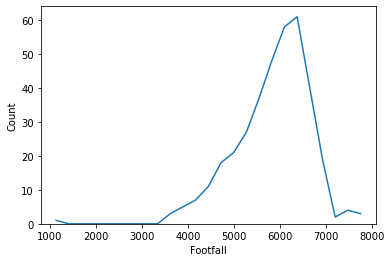

In [43]:
sns.histplot(df.Footfall, element = 'poly', fill= False)

In [44]:
#Orders the days. Otherwise it will start with the day of the entry in the dataset. Which is Thursday
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

TypeError: 'float' object is not callable

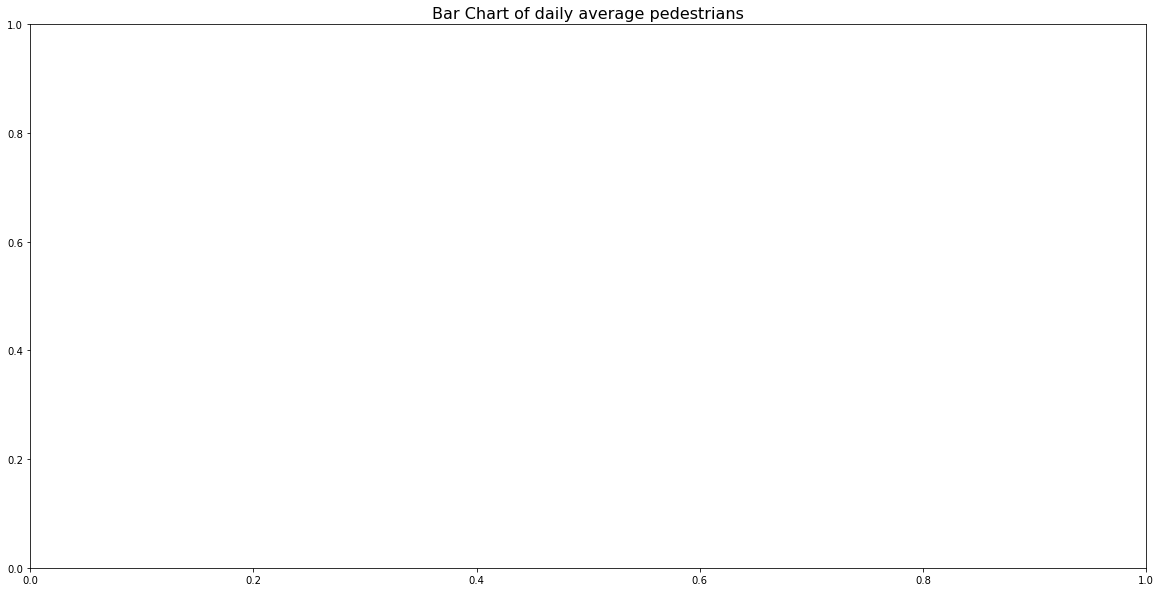

In [45]:
#Bar Chart for average footfall in January
plt.figure(figsize=(20,10))
plt.title("Bar Chart of daily average pedestrians", fontsize='16')
ax=sns.barplot(x="Month",y="Footfall", data=df,estimator=mean,hue="DayOfWeek", hue_order=hueOrder,order=["January"]);

In [ ]:
#Bar chart for April
plt.figure(figsize=(20,10))
ax1=sns.barplot(x="Month",y="Footfall",data=df,estimator=mean,hue="DayOfWeek", hue_order=hueOrder,order=["April"]);

In [ ]:
#Bar Chart for September
plt.figure(figsize=(20,10))
ax2=sns.barplot(x="Month",y="Footfall",data=df,estimator=mean,hue="DayOfWeek", hue_order=hueOrder,order=["September"]);

In [46]:
df.corr()

,Footfall,In,Out
Footfall,1.000000,0.950962,0.928191
In,0.950962,1.000000,0.767578
Out,0.928191,0.767578,1.000000


Text(0.5, 0, 'Day of Year')

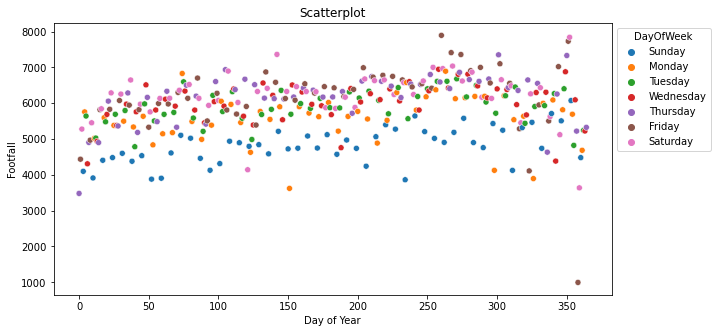

In [47]:
#Scatterplot
plt.figure(figsize=(10,5))
ax2 = sns.scatterplot(data=df, x=df.index, y='Footfall',hue_order=hueOrder, hue='DayOfWeek')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatterplot")
plt.xlabel("Day of Year")

# 4.Machine Learning

## 4.1 Integer Encoding

In [53]:
#Goes through the days and puts all the results into an array. The weekday() function returns a number that represents the day
dayArray1 = []
for days in df["Date"]:
    dayArray1.append(days.weekday())

In [54]:
#Replaces day of the week with the integers
df = df.assign(DayOfWeek=dayArray1)

In [55]:
#Test to see it worked
df["Date"][0].month

1

In [56]:
#Same as above but for months
monthArray1 = []
for month in df["Date"]:
    monthArray1.append(month.month)
df = df.assign(Month=monthArray1)

In [57]:
df.head()

,Date,Footfall,In,Out,DayOfWeek,Month
0,2015-01-01,3481,1593,1888,3,1
1,2015-01-02,4437,2150,2287,4,1
2,2015-01-03,5278,2819,2459,5,1
3,2015-01-04,4098,2020,2078,6,1
4,2015-01-05,5757,3162,2595,0,1


## 4.2 Building a SVM model

In [58]:
#Independent Variables
X = df.drop(columns=["In", "Out", "DayOfWeek", "Date"]) # Only want Month, Day
print(X)

     Footfall  Month
0        3481      1
1        4437      1
2        5278      1
3        4098      1
4        5757      1
..        ...    ...
360      4481     12
361      4685     12
362      5243     12
363      5224     12
364      5326     12

[365 rows x 2 columns]


In [59]:
#Target Variable
y = df["DayOfWeek"]
print(y)

0      3
1      4
2      5
3      6
4      0
      ..
360    6
361    0
362    1
363    2
364    3
Name: DayOfWeek, Length: 365, dtype: int64


In [132]:
#Make the model
model = SVC(random_state=3)

In [133]:
#Test, train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fit the model
model.fit(X_train, y_train)

SVC(random_state=3)

In [134]:
#See its score to test affectiveness
model.score(X_test, y_test)

0.2818181818181818

C:\Users\yamyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


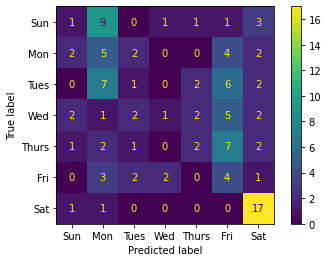

In [135]:
#Confusion Matrix
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format="d",
                      display_labels=["Sun",
                                      "Mon",
                                      "Tues",
                                      "Wed",
                                      "Thurs",
                                     "Fri",
                                     "Sat",])

In [136]:
#Find the best parameters to optimise the model
parameterGrid=[
    {"C":[0.5,1,10,100],
     "gamma":["scale", 1, 0.1, 0.01, 0.001, 0.0001],
     "kernel":["rbf"]},]

optimalParameters = GridSearchCV(
    SVC(),
    parameterGrid,
    cv=5,
    scoring="accuracy")
optimalParameters.fit(X_train,y_train)
print(optimalParameters.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


Optimal values for C and gamma are 100 and 0.01 respectively

In [137]:
#New model with optimised parameters and score
model = SVC(random_state=3,C=100, gamma=0.01, kernel="rbf")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3181818181818182

Accuracy score has been improved to ~32%

C:\Users\yamyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


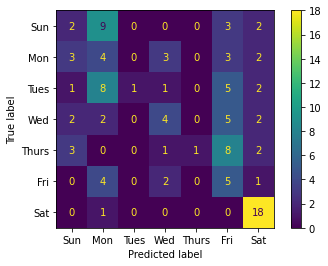

In [138]:
#Updated confusion matrix
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format="d",
                      display_labels=["Sun",
                                      "Mon",
                                      "Tues",
                                      "Wed",
                                      "Thurs",
                                     "Fri",
                                     "Sat",])

In [139]:
#precision and recall
y_pred = model.predict(X_test)
print("Precision is: " + str(metrics.precision_score(y_test, y_pred,average="macro")))
print("Recall is: " + str(metrics.recall_score(y_test, y_pred,average="macro")))

Precision is: 0.4973450195125072
Recall is: 0.3063700918964077


## 4.3 Decision Tree Model

## Preliminary Tree Model

In [141]:
# Make the model, fit it, print score
treeModel = DecisionTreeClassifier(random_state=2)

treeModel = treeModel.fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20909090909090908


[Text(0.3642702481273408, 0.9807692307692307, 'X[0] <= -0.64\ngini = 0.857\nsamples = 255\nvalue = [36, 37, 34, 38, 37, 40, 33]'),
 Text(0.09082397003745318, 0.9423076923076923, 'X[0] <= -2.517\ngini = 0.679\nsamples = 54\nvalue = [10, 3, 3, 3, 4, 3, 28]'),
 Text(0.03146067415730337, 0.9038461538461539, 'X[0] <= -4.257\ngini = 0.667\nsamples = 3\nvalue = [1, 0, 0, 0, 1, 1, 0]'),
 Text(0.02546816479400749, 0.8653846153846154, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]'),
 Text(0.03745318352059925, 0.8653846153846154, 'X[1] <= 0.736\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 1, 0]'),
 Text(0.03146067415730337, 0.8269230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.04344569288389513, 0.8269230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text(0.150187265917603, 0.9038461538461539, 'X[0] <= -1.142\ngini = 0.652\nsamples = 51\nvalue = [9, 3, 3, 3, 3, 2, 28]'),
 Text(0.09063670411985018, 0.8653846153846154, 'X[1] <=

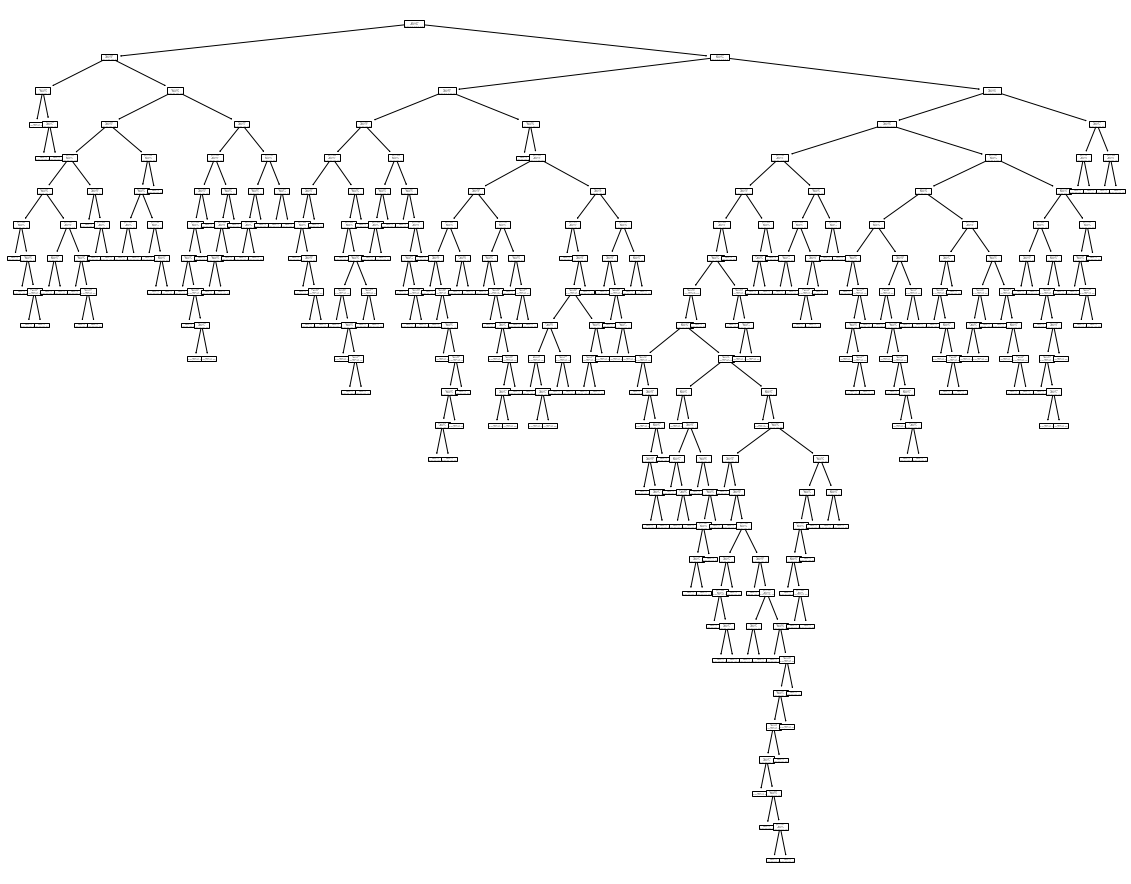

In [142]:
#Plot the tree diagram
plt.figure(figsize=(20,16))

tree.plot_tree(treeModel.fit(X_train, y_train)) 

In [150]:
#Updated model with new parameters
treeModel = DecisionTreeClassifier(random_state=2,criterion="entropy", max_depth=3)

treeModel = treeModel.fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2818181818181818


[Text(0.5, 0.875, 'X[0] <= -0.054\nentropy = 2.805\nsamples = 255\nvalue = [36, 37, 34, 38, 37, 40, 33]'),
 Text(0.25, 0.625, 'X[0] <= -0.876\nentropy = 2.502\nsamples = 102\nvalue = [24, 17, 9, 7, 5, 7, 33]'),
 Text(0.125, 0.375, 'X[1] <= -1.409\nentropy = 1.94\nsamples = 44\nvalue = [8, 1, 3, 1, 4, 2, 25]'),
 Text(0.0625, 0.125, 'entropy = 2.197\nsamples = 9\nvalue = [1, 0, 2, 1, 2, 0, 3]'),
 Text(0.1875, 0.125, 'entropy = 1.65\nsamples = 35\nvalue = [7, 1, 1, 0, 2, 2, 22]'),
 Text(0.375, 0.375, 'X[0] <= -0.44\nentropy = 2.502\nsamples = 58\nvalue = [16, 16, 6, 6, 1, 5, 8]'),
 Text(0.3125, 0.125, 'entropy = 2.507\nsamples = 24\nvalue = [4, 4, 2, 6, 0, 3, 5]'),
 Text(0.4375, 0.125, 'entropy = 2.123\nsamples = 34\nvalue = [12, 12, 4, 0, 1, 2, 3]'),
 Text(0.75, 0.625, 'X[0] <= 0.242\nentropy = 2.515\nsamples = 153\nvalue = [12, 20, 25, 31, 32, 33, 0]'),
 Text(0.625, 0.375, 'X[0] <= 0.071\nentropy = 2.28\nsamples = 31\nvalue = [5, 7, 7, 0, 8, 4, 0]'),
 Text(0.5625, 0.125, 'entropy = 1.88

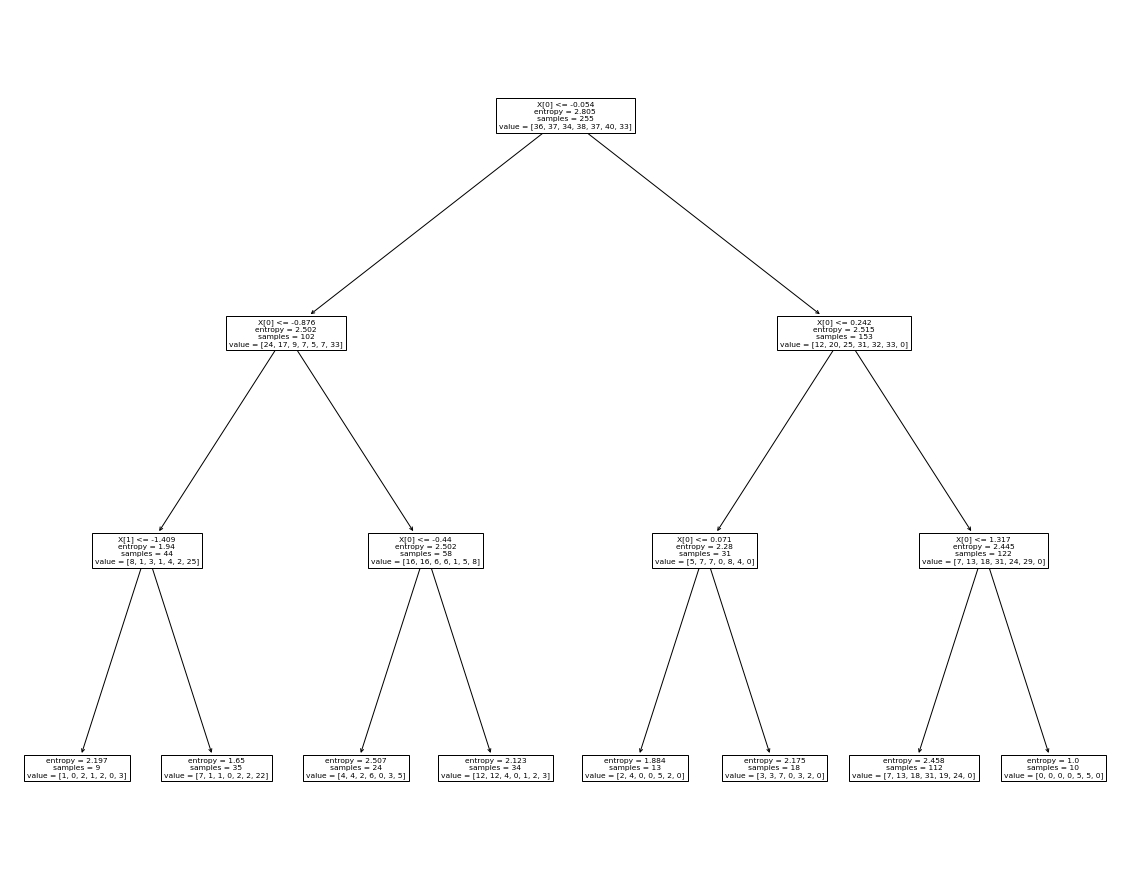

In [151]:
#Updated tree
plt.figure(figsize=(20,16))

tree.plot_tree(treeModel.fit(X_train, y_train))

# 5. References

https://www.statology.org/poisson-distribution-python/#:~:text=The%20Poisson%20distribution%20describes%20the,*%20e–%20λ%20%2F%20k! <br>
https://www.youtube.com/watch?v=8A7L0GsBiLQ <br>
https://www.youtube.com/watch?v=IUcvPo2WCB8&t=394s <br>
https://www.youtube.com/watch?v=q90UDEgYqeI&t=2892s <br>